In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
test = pd.read_csv('test_set_features.csv')
train = pd.read_csv('training_set_features.csv')
labels = pd.read_csv('training_set_labels.csv')
combine = pd.concat([train, test], axis = 0)
full_train = pd.concat([labels, train], axis = 1)

In [3]:
combine.head()

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,Below Poverty,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,Below Poverty,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,Below Poverty,Not Married,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,"<= $75,000, Above Poverty",Married,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb


In [4]:
combine_cols = combine.columns
labels_cols = labels.columns

In [5]:
#check column names
print(combine_cols)
print(labels_cols)

Index(['respondent_id', 'h1n1_concern', 'h1n1_knowledge',
       'behavioral_antiviral_meds', 'behavioral_avoidance',
       'behavioral_face_mask', 'behavioral_wash_hands',
       'behavioral_large_gatherings', 'behavioral_outside_home',
       'behavioral_touch_face', 'doctor_recc_h1n1', 'doctor_recc_seasonal',
       'chronic_med_condition', 'child_under_6_months', 'health_worker',
       'health_insurance', 'opinion_h1n1_vacc_effective', 'opinion_h1n1_risk',
       'opinion_h1n1_sick_from_vacc', 'opinion_seas_vacc_effective',
       'opinion_seas_risk', 'opinion_seas_sick_from_vacc', 'age_group',
       'education', 'race', 'sex', 'income_poverty', 'marital_status',
       'rent_or_own', 'employment_status', 'hhs_geo_region', 'census_msa',
       'household_adults', 'household_children', 'employment_industry',
       'employment_occupation'],
      dtype='object')
Index(['respondent_id', 'h1n1_vaccine', 'seasonal_vaccine'], dtype='object')


In [6]:
#check the shape of the dataframes
print(train.shape)
print(test.shape)
print(labels.shape)
print(combine.shape)

(26707, 36)
(26708, 36)
(26707, 3)
(53415, 36)


In [7]:
#look at the response variables
labels.describe()

,respondent_id,h1n1_vaccine,seasonal_vaccine
count,26707.000000,26707.000000,26707.000000
mean,13353.000000,0.212454,0.465608
std,7709.791156,0.409052,0.498825
min,0.000000,0.000000,0.000000
25%,6676.500000,0.000000,0.000000
50%,13353.000000,0.000000,0.000000
75%,20029.500000,0.000000,1.000000
max,26706.000000,1.000000,1.000000


In [8]:
#26707 total rows
#21.2% got h1n1_vaccine
#46.6% got seasonal vaccine

In [9]:
combine.describe()

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,health_worker,health_insurance,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,household_adults,household_children
count,53415.000000,53238.000000,53177.000000,53265.000000,52994.000000,53377.000000,53333.000000,53256.000000,53251.000000,53159.000000,...,51822.000000,28913.000000,52626.000000,52647.000000,52645.000000,52501.000000,52402.000000,52357.000000,52941.000000,52941.000000
mean,26707.000000,1.620816,1.264287,0.049244,0.727705,0.069131,0.825849,0.355077,0.337271,0.680506,...,0.111709,0.883824,3.847623,2.334701,2.359141,4.025409,2.713923,2.130756,0.890406,0.539166
std,15419.726651,0.906534,0.616881,0.216380,0.445145,0.253679,0.379243,0.478541,0.472783,0.466285,...,0.315012,0.320442,1.007498,1.280608,1.361078,1.084875,1.380553,1.336077,0.753836,0.931626
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,13353.500000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,3.000000,1.000000,1.000000,4.000000,2.000000,1.000000,0.000000,0.000000
50%,26707.000000,2.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,...,0.000000,1.000000,4.000000,2.000000,2.000000,4.000000,2.000000,2.000000,1.000000,0.000000
75%,40060.500000,2.000000,2.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,...,0.000000,1.000000,5.000000,4.000000,4.000000,5.000000,4.000000,4.000000,1.000000,1.000000
max,53414.000000,3.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,3.000000,3.000000


In [10]:
combine.dtypes

respondent_id                    int64
h1n1_concern                   float64
h1n1_knowledge                 float64
behavioral_antiviral_meds      float64
behavioral_avoidance           float64
behavioral_face_mask           float64
behavioral_wash_hands          float64
behavioral_large_gatherings    float64
behavioral_outside_home        float64
behavioral_touch_face          float64
doctor_recc_h1n1               float64
doctor_recc_seasonal           float64
chronic_med_condition          float64
child_under_6_months           float64
health_worker                  float64
health_insurance               float64
opinion_h1n1_vacc_effective    float64
opinion_h1n1_risk              float64
opinion_h1n1_sick_from_vacc    float64
opinion_seas_vacc_effective    float64
opinion_seas_risk              float64
opinion_seas_sick_from_vacc    float64
age_group                       object
education                       object
race                            object
sex                      

In [11]:
all_data_na = (combine.isnull().sum()/len(combine))
all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending=False)[:40]
missing_data = pd.DataFrame({'Missing Ratio':all_data_na})
missing_data.head(40)

,Missing Ratio
employment_occupation,0.503529
employment_industry,0.498081
health_insurance,0.458710
income_poverty,0.166994
doctor_recc_seasonal,0.080876
doctor_recc_h1n1,0.080876
rent_or_own,0.076346
employment_status,0.054928
marital_status,0.053356
education,0.052682


In [12]:
#looks like employment occupation and employment industry is not code for not in work force where blank.
combine['employment_industry'] = combine['employment_industry'].fillna('abcde')
combine['employment_occupation'] = combine['employment_occupation'].fillna('fghij')

In [13]:
obj_cols = combine.select_dtypes(include = 'object').columns

In [14]:
obj_cols

Index(['age_group', 'education', 'race', 'sex', 'income_poverty',
       'marital_status', 'rent_or_own', 'employment_status', 'hhs_geo_region',
       'census_msa', 'employment_industry', 'employment_occupation'],
      dtype='object')

In [15]:
from sklearn.preprocessing import LabelEncoder
# process columns, apply LabelEncoder to categorical features
for c in obj_cols:
    lbl = LabelEncoder() 
    lbl.fit(list(combine[c].values)) 
    combine[c] = lbl.transform(list(combine[c].values))

# shape        
print('Shape all_data: {}'.format(combine.shape))

Shape all_data: (53415, 36)


In [16]:
combine.head()

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,2,1,0,1,8,2,0.0,0.0,0,6
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,2,1,1,0,1,0,0.0,0.0,13,20
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0,1,0,0,9,0,2.0,0.0,15,22
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,2,1,1,1,5,1,0.0,0.0,0,6
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,0,0,0,0,9,0,1.0,0.0,19,5


In [17]:
all_data_na = (combine.isnull().sum()/len(combine))
all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending=False)[:40]
missing_data = pd.DataFrame({'Missing Ratio':all_data_na})
missing_data.head(40)

,Missing Ratio
health_insurance,0.458710
doctor_recc_seasonal,0.080876
doctor_recc_h1n1,0.080876
chronic_med_condition,0.035627
child_under_6_months,0.030572
health_worker,0.029823
opinion_seas_sick_from_vacc,0.019807
opinion_seas_risk,0.018965
opinion_seas_vacc_effective,0.017111
opinion_h1n1_vacc_effective,0.014771


Text(0.5, 1.0, 'Percent missing data by feature')

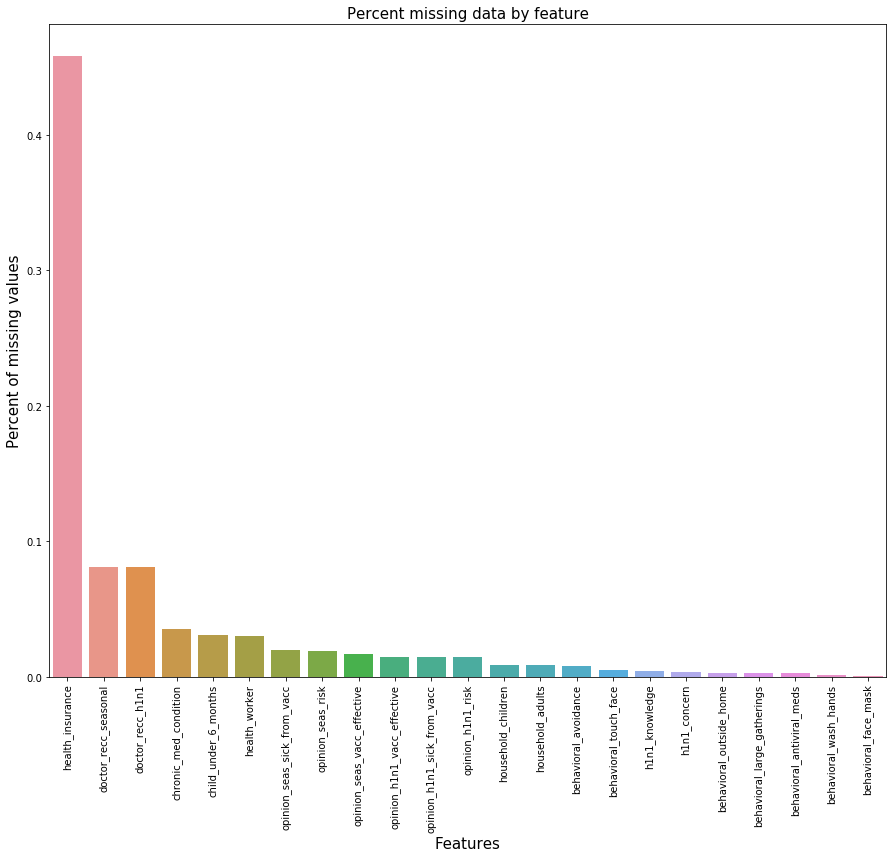

In [18]:
fig, ax = plt.subplots(figsize = (15,12))
plt.xticks(rotation='90')
sns.barplot(x=all_data_na.index, y=all_data_na)
plt.xlabel('Features', fontsize=15)
plt.ylabel('Percent of missing values', fontsize=15)
plt.title('Percent missing data by feature', fontsize=15)

In [19]:
#anything with under 2% missing, just input the mode
cols = ('opinion_seas_sick_from_vacc',
        'opinion_seas_risk',
        'opinion_seas_vacc_effective',
        'opinion_h1n1_vacc_effective',
        'opinion_h1n1_sick_from_vacc',
        'opinion_h1n1_risk',
        'household_adults',
        'household_children',
        'behavioral_avoidance',
        'behavioral_touch_face',
        'h1n1_knowledge',
        'h1n1_concern',
        'behavioral_outside_home',
        'behavioral_large_gatherings',
        'behavioral_antiviral_meds',
        'behavioral_wash_hands',
        'behavioral_face_mask')

for c in cols:
    combine[c] = combine[c].fillna(combine[c].mode()[0])
    

Text(0.5, 1.0, 'Percent missing data by feature')

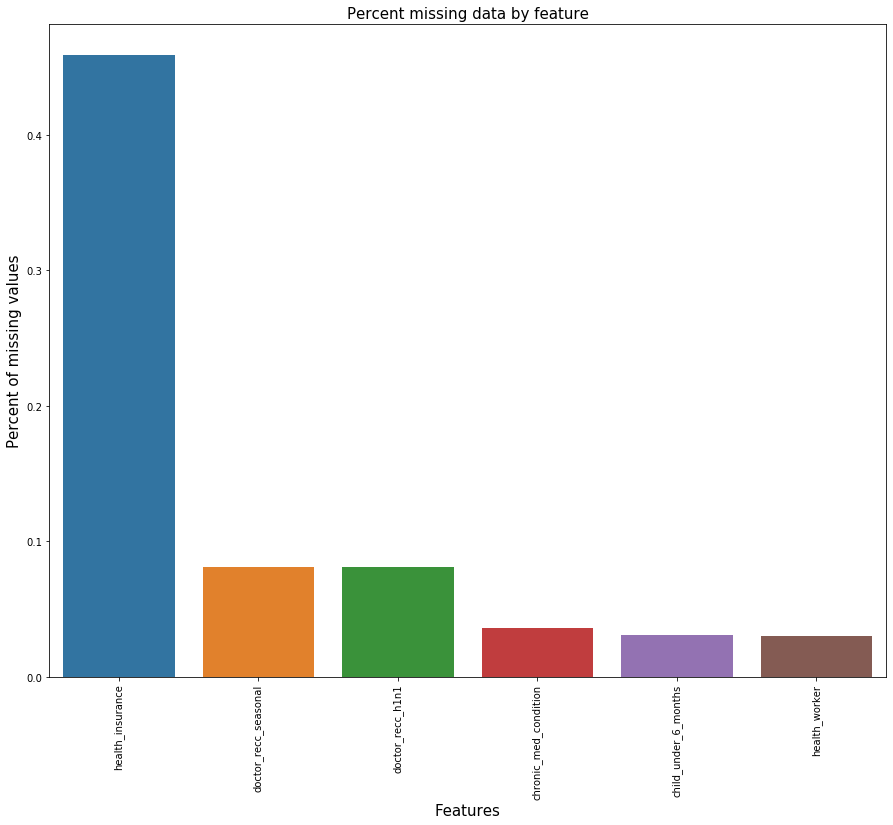

In [20]:
all_data_na = (combine.isnull().sum()/len(combine))
all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending=False)[:40]

fig, ax = plt.subplots(figsize = (15,12))
plt.xticks(rotation='90')
sns.barplot(x=all_data_na.index, y=all_data_na)
plt.xlabel('Features', fontsize=15)
plt.ylabel('Percent of missing values', fontsize=15)
plt.title('Percent missing data by feature', fontsize=15)

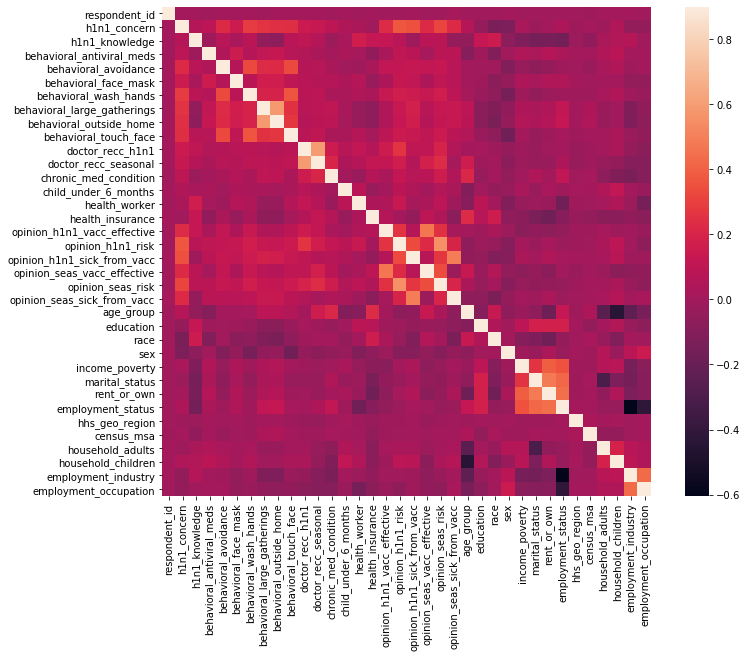

In [21]:
corrmat = combine.corr()
plt.subplots(figsize=(12,9))
sns.heatmap(corrmat, vmax=0.9, square=True)

In [23]:
combine['health_insurance'].value_counts()

1.0    25554
0.0     3359
Name: health_insurance, dtype: int64

In [24]:
#pct with health_insurance
w_health = len(combine.health_insurance[combine.health_insurance==1])
wo_health = len(combine.health_insurance[combine.health_insurance==0])
pct_w = w_health / (w_health + wo_health)
print('percentage with health insurance: ', pct_w)

percentage with health insurance:  0.8838238854494518


In [46]:
#build model to fill values
# Oversample and plot imbalanced dataset with SMOTE
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline
from imblearn.under_sampling import RandomUnderSampler
from numpy import where
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from numpy import mean

#try a decision tree classifier
from sklearn.tree import DecisionTreeClassifier

In [48]:
roc = []

for c in range(len(cols)):
    cols = ['doctor_recc_seasonal', 'doctor_recc_h1n1', 'chronic_med_condition', 'child_under_6_months',
                           'health_worker', 'health_insurance']
    
    a = cols[c]
    cols.pop(c)
    X = combine.drop(columns = cols)
    W = X[X[a].notnull()]
    y = W[a]
    X = X.drop([a], axis = 1)
    W = W.drop([a], axis = 1)
    
    oversample = SMOTE()
    W, y = oversample.fit_resample(W,y)
    
    model = DecisionTreeClassifier()
    # evaluate pipeline
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    scores = cross_val_score(model, W, y, scoring='roc_auc', cv=cv, n_jobs=-1)
    roc.append(scores)
    #fit model
    model.fit(W,y)
    
    #make predictions
    combine['preds'] = model.predict(X)
    combine[a] = np.where(combine[a].isnull(), 
                                           combine['preds'], combine[a])
    combine = combine.drop(['preds'], axis = 1)

In [ ]:
my_tab = pd.crosstab(index = combine['preds'],  # Make a crosstab
                              columns="count")      # Name the count column
my_tab
#looks like the predicted number is closer to what i'd expect (~12%). THis looks more accurate.

In [50]:
print(roc)

[array([0.70059556, 0.7042527 , 0.68566331, 0.69937284, 0.69343278,
       0.68749003, 0.69521487, 0.69369095, 0.69841512, 0.6967388 ,
       0.69511105, 0.68886258, 0.70562349, 0.68825111, 0.71186936,
       0.68429122, 0.69201463, 0.6906431 , 0.69308138, 0.68729046,
       0.69434992, 0.69114861, 0.69206278, 0.69465174, 0.68946867,
       0.69708705, 0.69521487, 0.6904907 , 0.69567205, 0.70115818]), array([0.79097702, 0.78587105, 0.79474097, 0.79513344, 0.79683412,
       0.78780743, 0.79290947, 0.79277865, 0.79434851, 0.78322868,
       0.7920239 , 0.78116236, 0.78597593, 0.78898482, 0.78754579,
       0.78506018, 0.78806907, 0.78963893, 0.78793825, 0.78597593,
       0.77868062, 0.78587194, 0.79513344, 0.79447933, 0.7833595 ,
       0.78754579, 0.79683412, 0.78532182, 0.78636839, 0.79683412]), array([0.72877231, 0.7286371 , 0.74553813, 0.73431585, 0.72174148,
       0.72687939, 0.73103625, 0.73657869, 0.73657624, 0.72995192,
       0.7302596 , 0.7351271 , 0.72755544, 0.73485668, 0.